## Import Libraries

First, I import numpy and pandas to load the data sets into pandas data frames.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

I read in 2 education datasets to perform an analytical study on enrollment numbers from [DataBank, Education Statistics](https://databank.worldbank.org/source/education-statistics-%5E-all-indicators# "DataBank, Education Statistics - All Indicators"). These hold data of enrollment numbers in primary and secondary education from the past two decades (2000-2020) in 268 countries. I loaded the data sets into panda data frames. 

In [5]:
primary_df = pd.read_csv('../data/raw/primary_enrollment.csv')
#primary_df = pd.read_csv('../data/raw/primary_enrollment.csv', index_col=0, na_values=['(NA)']).fillna(0)
secondary_df = pd.read_csv('../data/raw/secondary_enrollment.csv')
primary_teachers_df = pd.read_csv('../data/raw/primary_teachers.csv')

I learned that the read_csv function turns the data into a Python data frame.

In [6]:
type(primary_df['2000 [YR2000]'][0])

str

I peeked at the primary and secondary enrollment data sets to see how they are formatted. Because they are from the same source, I know they will be identically formatted. I check the head of one and tail of the other.

In [7]:
primary_df.head()

,Country Name,Country Code,Series,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,"Enrolment in primary education, both sexes (nu...",SE.PRM.ENRL,749360,773623,2667629,3781015,4430142,4318819,...,5291624,5767543,5986268,6217756,6199329,6265011,6350404,6544906,..,..
1,Albania,ALB,"Enrolment in primary education, both sexes (nu...",SE.PRM.ENRL,283249,274233,263603,252829,240487,237975,...,215660,206617,198897,195720,188371,179564,174836,170861,..,..
2,Algeria,DZA,"Enrolment in primary education, both sexes (nu...",SE.PRM.ENRL,4843313,4720950,4691870,4612574,4507703,4361744,...,3363236,3451588,3608812,3765307,3925429,4118362,4283207,4429994,..,..
3,American Samoa,ASM,"Enrolment in primary education, both sexes (nu...",SE.PRM.ENRL,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,"Enrolment in primary education, both sexes (nu...",SE.PRM.ENRL,..,..,4108,4142,4264,4085,...,4263,4130,4068,4065,4164,4248,4263,4325,..,..


## Cleaning the data

I notice that the country codes, series codes and series are unnecessary values as the entire data set has the same value for that field. The country code is redundant as we can instead use the country name. I remove the unecessary columns from the primary and secondary enrollment tables (as they have the same columns headers). The country name will later be used to merge the data sets, so I leave that untouched.

In [8]:
primary_df = primary_df.drop(columns=['Series Code', 'Series', 'Country Code'])
primary_df.head(15)

,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,749360,773623,2667629,3781015,4430142,4318819,4669110,4718077,4974836,...,5291624,5767543,5986268,6217756,6199329,6265011,6350404,6544906,..,..
1,Albania,283249,274233,263603,252829,240487,237975,222402,210125,199454,...,215660,206617,198897,195720,188371,179564,174836,170861,..,..
2,Algeria,4843313,4720950,4691870,4612574,4507703,4361744,4196580,4086925,3942242,...,3363236,3451588,3608812,3765307,3925429,4118362,4283207,4429994,..,..
3,American Samoa,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,..,..,4108,4142,4264,4085,4332,4427,4492,...,4263,4130,4068,4065,4164,4248,4263,4325,..,..
5,Angola,..,..,..,..,..,..,..,3558605,3930051,...,5026803,..,..,..,5620915,..,..,..,..,..
6,Antigua and Barbuda,13025,..,..,..,..,..,..,11569,11562,...,10855,10453,..,10172,10077,..,9946,10123,..,..
7,Arab World,36143539.2038,36776401.75807,37517561.2799,37339269.87014,37734444.04094,39707147.44042,40289681.77578,40682679.27351,41293269.10492,...,42111397.04012,43447614.05128,43561851.84598,44953898.81266,45895048.82111,46756233.56551,47477656.41764,48605214.19301,..,..
8,Argentina,4900956,4950674,4986758,4885664,4923075,4872889,4928319,4951505,4975520,...,4911776,4871157,4791544,4780105,4784446,4775782,4753843,..,..,..
9,Armenia,180306,176302,155423,143822,134664,125149,121502,127546,121841,...,136716,138470,140638,142517,144549,148481,152134,153415,..,..


In [9]:
secondary_df = secondary_df.drop(columns=['Series Code', 'Series', 'Country Code'])
secondary_df.tail(15)

,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
258,Uzbekistan,3565979,..,..,4258787,4338358,4515852,4542174,4598037,4497372,...,4370300,4335596,4195583,4082709,3964383,3908744,3892888,..,..,..
259,Vanuatu,10446,10934,12313,12800,13837,..,..,..,..,...,..,..,..,..,20568,..,..,..,..,..
260,"Venezuela, RB",1543425,1677807,1811127,1866114,1953506,2028388,2104857,2174619,2224214,...,2287393,2354412,2574580,2567278,2522661,2427635,2391174,..,..,..
261,Vietnam,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
262,Virgin Islands (U.S.),..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
263,West Bank and Gaza,477378,510214,544935,582736,628495,656797,685585,701715,707892,...,705627,705443,706330,709226,721414,733345,752552,764986,..,..
264,World,452343903.9156,464285560.54336,477783279.87582,490945481.66426,501809672.89188,509250692.42688,515568565.1422,523794029.57298,531882816.17525,...,555106295.76506,562104568.88883,573822269.7459,580889066.72894,582973669.10168,586554023.09308,588386690.81969,594659734.58358,..,..
265,"Yemen, Rep.",..,1249016,..,1373362,1446369,1455206,..,..,1479157,...,1643116,1674950,1768102,..,..,1915871,..,..,..,..
266,Zambia,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
267,Zimbabwe,844183,866171,828456,758229,..,..,..,..,..,...,..,936734,957461,..,..,..,..,..,..,..


I notice that the last few rows of the data sets contain blank cells or NaNs. So, I remove all rows containing NaN in both datasets.

In [10]:
primary_df = primary_df.dropna()
primary_df.tail()

,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
263,West Bank and Gaza,388163,398978,402370,401372,388948,387138,381904,383559,390051,...,411368,424095,430409,442476,450182,459463,477204,488184,..,..
264,World,657298103.97415,654326202.98579,649710615.3478,654810397.00936,675425633.07925,678916276.80773,681305507.54966,689518727.26185,693645358.87925,...,701882770.553,710180672.75139,717105086.58085,715422681.08264,720007988.81708,736222453.53388,740863824.84136,750735035.02582,..,..
265,"Yemen, Rep.",..,2643579,2783371,2950403,3107801,3219564,..,..,3282457,...,3640590,3684948,3874741,..,..,3900134,..,..,..,..
266,Zambia,1589544,1625647,1731579,..,2251357,2572846,2678610,2790312,2909436,...,3030120,3135442,3075161,3217872,3215723,3203220,3284841,..,..,..
267,Zimbabwe,2460669,2534796,2399250,2361588,..,..,..,..,..,...,..,2666451,2663187,..,..,..,..,..,..,..


In [11]:
secondary_df = secondary_df.dropna()
secondary_df.tail()

,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
263,West Bank and Gaza,477378,510214,544935,582736,628495,656797,685585,701715,707892,...,705627,705443,706330,709226,721414,733345,752552,764986,..,..
264,World,452343903.9156,464285560.54336,477783279.87582,490945481.66426,501809672.89188,509250692.42688,515568565.1422,523794029.57298,531882816.17525,...,555106295.76506,562104568.88883,573822269.7459,580889066.72894,582973669.10168,586554023.09308,588386690.81969,594659734.58358,..,..
265,"Yemen, Rep.",..,1249016,..,1373362,1446369,1455206,..,..,1479157,...,1643116,1674950,1768102,..,..,1915871,..,..,..,..
266,Zambia,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
267,Zimbabwe,844183,866171,828456,758229,..,..,..,..,..,...,..,936734,957461,..,..,..,..,..,..,..


## Merge the Datasets

I merge the datasets using the country name, so that a row contains both primary and secondary enrollment values.

**Exploratory Data Analysis Idea:** To compare the primary and secondary level enrollment numbers to understand the retention, and growth in number of students who continue on to receive a secondary level education.

In [12]:
primary_and_secondary = pd.merge(primary_df, secondary_df, on='Country Name')
primary_and_secondary

,Country Name,2000 [YR2000]_x,2001 [YR2001]_x,2002 [YR2002]_x,2003 [YR2003]_x,2004 [YR2004]_x,2005 [YR2005]_x,2006 [YR2006]_x,2007 [YR2007]_x,2008 [YR2008]_x,...,2011 [YR2011]_y,2012 [YR2012]_y,2013 [YR2013]_y,2014 [YR2014]_y,2015 [YR2015]_y,2016 [YR2016]_y,2017 [YR2017]_y,2018 [YR2018]_y,2019 [YR2019]_y,2020 [YR2020]_y
0,Afghanistan,749360,773623,2667629,3781015,4430142,4318819,4669110,4718077,4974836,...,2208963,2415884,2538420,2602734,2651459,2725421,2899453,3063889,..,..
1,Albania,283249,274233,263603,252829,240487,237975,222402,210125,199454,...,355158,349269,346365,333291,315079,294315,280378,268872,..,..
2,Algeria,4843313,4720950,4691870,4612574,4507703,4361744,4196580,4086925,3942242,...,4572513,..,..,..,..,..,..,..,..,..
3,American Samoa,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,..,..,4108,4142,4264,4085,4332,4427,4492,...,4159,4208,4239,4319,4395,4425,4492,4513,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,West Bank and Gaza,388163,398978,402370,401372,388948,387138,381904,383559,390051,...,705627,705443,706330,709226,721414,733345,752552,764986,..,..
264,World,657298103.97415,654326202.98579,649710615.3478,654810397.00936,675425633.07925,678916276.80773,681305507.54966,689518727.26185,693645358.87925,...,555106295.76506,562104568.88883,573822269.7459,580889066.72894,582973669.10168,586554023.09308,588386690.81969,594659734.58358,..,..
265,"Yemen, Rep.",..,2643579,2783371,2950403,3107801,3219564,..,..,3282457,...,1643116,1674950,1768102,..,..,1915871,..,..,..,..
266,Zambia,1589544,1625647,1731579,..,2251357,2572846,2678610,2790312,2909436,...,..,..,..,..,..,..,..,..,..,..


In [13]:
decade_data = primary_and_secondary[['Country Name', '2000 [YR2000]_x', '2000 [YR2000]_y', 
                                                    '2010 [YR2010]_x', '2010 [YR2010]_y',
                                                    '2020 [YR2020]_x', '2020 [YR2020]_y']]
decade_data.head(15)

,Country Name,2000 [YR2000]_x,2000 [YR2000]_y,2010 [YR2010]_x,2010 [YR2010]_y,2020 [YR2020]_x,2020 [YR2020]_y
0,Afghanistan,749360,..,5279326,2044157,..,..
1,Albania,283249,365664,224781,355871,..,..
2,Algeria,4843313,2994258,3312440,4616226,..,..
3,American Samoa,..,..,..,..,..,..
4,Andorra,..,..,4367,4059,..,..
5,Angola,..,354984,4273006,850334,..,..
6,Antigua and Barbuda,13025,5276,11254,8436,..,..
7,Arab World,36143539.2038,23384066.79699,41836868.06887,30240952.75947,..,..
8,Argentina,4900956,3829421,4947105,4213136,..,..
9,Armenia,180306,409423,101819,305765,..,..


I notice that the data is missing for 2020, so I compare 2015 instead.

In [14]:
comparative_data = primary_and_secondary[['Country Name', '2000 [YR2000]_x', '2000 [YR2000]_y', 
                                                    '2010 [YR2010]_x', '2010 [YR2010]_y',
                                                    '2015 [YR2015]_x', '2015 [YR2015]_y']]
comparative_data.head(15)

,Country Name,2000 [YR2000]_x,2000 [YR2000]_y,2010 [YR2010]_x,2010 [YR2010]_y,2015 [YR2015]_x,2015 [YR2015]_y
0,Afghanistan,749360,..,5279326,2044157,6199329,2651459
1,Albania,283249,365664,224781,355871,188371,315079
2,Algeria,4843313,2994258,3312440,4616226,3925429,..
3,American Samoa,..,..,..,..,..,..
4,Andorra,..,..,4367,4059,4164,4395
5,Angola,..,354984,4273006,850334,5620915,..
6,Antigua and Barbuda,13025,5276,11254,8436,10077,8048
7,Arab World,36143539.2038,23384066.79699,41836868.06887,30240952.75947,45895048.82111,31432799.80178
8,Argentina,4900956,3829421,4947105,4213136,4784446,4501734
9,Armenia,180306,409423,101819,305765,144549,240291


There are some missing values that are denoted by "..". I remove those rows, so that they do not cause problems when I use graphs to visualize the data.

In [15]:
comparative_data = comparative_data[(comparative_data != '..').all(1)]
comparative_data.head(15)

,Country Name,2000 [YR2000]_x,2000 [YR2000]_y,2010 [YR2010]_x,2010 [YR2010]_y,2015 [YR2015]_x,2015 [YR2015]_y
1,Albania,283249,365664,224781,355871,188371,315079
6,Antigua and Barbuda,13025,5276,11254,8436,10077,8048
7,Arab World,36143539.2038,23384066.79699,41836868.06887,30240952.75947,45895048.82111,31432799.80178
8,Argentina,4900956,3829421,4947105,4213136,4784446,4501734
9,Armenia,180306,409423,101819,305765,144549,240291
12,Austria,392407,748659,328015,743709,327816.83333,691071.25202
17,Barbados,24475,21016,22659,19497,20909,20554
19,Belgium,773742,1057536,731761,1202775,782606,1217912
20,Belize,44788,23235,52650,32780,52072,37856
23,Bhutan,85092,25241,110369,60036,99291,74320


In [16]:
cols = comparative_data.columns.drop('Country Name')
comparative_data[cols] = comparative_data[cols].apply(pd.to_numeric, errors='coerce')

mean_data = comparative_data.mean(axis=0)
mean_data
#type(mean_data)

2000 [YR2000]_x    4.587874e+07
2000 [YR2000]_y    2.993770e+07
2010 [YR2010]_x    4.997560e+07
2010 [YR2010]_y    3.696235e+07
2015 [YR2015]_x    5.204594e+07
2015 [YR2015]_y    3.984779e+07
dtype: float64

## Visualize

I plot the data of the primary and secondary enrollment numbers to check if the retention rate between primary and secondary education is consistent.

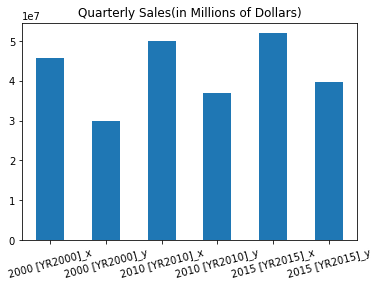

In [17]:
mean_data.plot.bar(rot=15, title="Quarterly Sales(in Millions of Dollars)");

plt.show(block=True);

x -> primary enrollment
y -> secondary enrollment

I observe that the retention in students is the least in the 2000 period, as there is the greatest difference between the enrollment primary and numbers. The retention increases through the decades. Further, I would try to do a comparative study between the student to teacher ratio in the time periods where the retention rate was low.